# Hyperopt: Space Configuration

One of the most valuable offers of Hyperopt is the flexibility it provides to create priors over the hyperparameters distributions.

Hyperopt offers:

- Multiple distributions
- Possibility to combine distributions
- Possibility to create nested spaces
- Multiple configuration ways including lists, dictionaries and tuples


## Distributions

Taken from [hp documentation](http://hyperopt.github.io/hyperopt/getting-started/search_spaces/) 

- **hp.choice**: returns one of several options (suitable for categorical hyperparams)
- **hp.randint**: returns a random integer between 0 and an upper limit
- **hp.uniform**: returns a value uniformly between specified limits
- **hp.quniform**: Returns a value like round(uniform(low, high) / q) * q

**hp.quniform** would be an equivalent of randint (if q=1), but the upper **and lower** limits can be specified. hp.quniform also offers the possibility to use bigger values of q. So if we search for the optimal number of trees in a random forest, we could search hp.quniform('n_estimators', 10, 1000, 50), in which case we would sample between 10 and 1000 trees in increments of 50.

- **hp.loguniform**: draws values from exp(uniform(low, high)) so that the logarithm of the returned value is uniformly distributed
- **hp.qloguniform**: Returns a value like round(exp(uniform(low, high)) / q) * q (similar use and cautions to hp.quniform but for log-uniform distributions)
- **hp.normal**: draws from a normal distribution with specified mu and sigma
- **hp.qnormal**: Returns a value like round(normal(mu, sigma) / q) * q
- **hp.lognormal**: Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed
- **hp.qlognormal**: Returns a value like round(exp(normal(mu, sigma)) / q) * q

### Important for q distributions
Another thing to notice is that q-distributions (qnormal, quniform, etc) return floats, where the value of the hyperparameter needs to be an integer (otherwise most models will return an error). Thus, some re-casting is necessary to pass this value to the models.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample

# Distributions

## Numerical hyperparameters

In [2]:
# function to extract samples from the hyperparameter
# space and plot their distribution

def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).hist(bins=50)
    plt.title(title)
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### randint

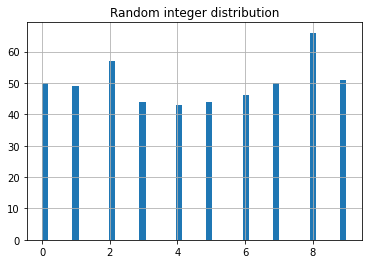

example values:  [array(1, dtype=int64), array(6, dtype=int64), array(3, dtype=int64), array(2, dtype=int64), array(5, dtype=int64)]


In [3]:
# randint

space = [{'example' : hp.randint('example', 10)}]

sample_and_plot(space, 'Random integer distribution')

### uniform

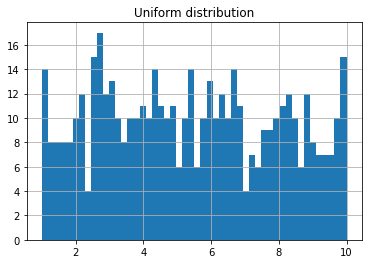

example values:  [9.741655466782204, 5.788324204181083, 9.196652643793872, 7.135219066875074, 2.807302947029104]


In [4]:
# uniform

space = [{'example' : hp.uniform('example', 1, 10)}]

sample_and_plot(space, 'Uniform distribution')

### quniform

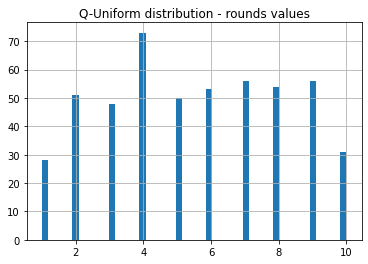

example values:  [6.0, 2.0, 4.0, 3.0, 1.0]


In [5]:
# quniform

space = [{'example' : hp.quniform('example', 1, 10, 1)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values')

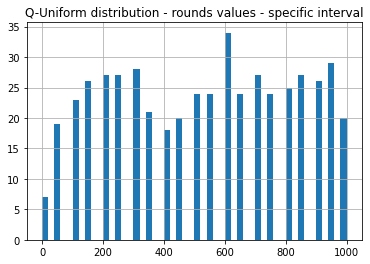

example values:  [1000.0, 950.0, 650.0, 800.0, 800.0]


In [6]:
# with quniform we can change the limits (respect to randint)

space = [{'example' : hp.quniform('example', 10, 1000, 50)}]

sample_and_plot(space, 'Q-Uniform distribution - rounds values - specific interval')

### loguniform

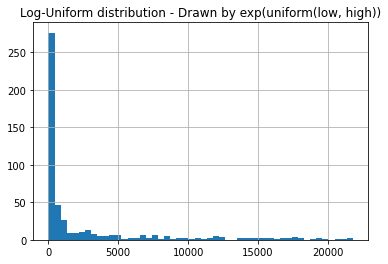

example values:  [2.8648199584090333, 173.82250160020538, 615.3982635281783, 20.304889301461323, 2015.1576300790712]


In [7]:
# loguniform

space = [{'example' : hp.loguniform('example', 1, 10)}]

sample_and_plot(space, 'Log-Uniform distribution - Drawn by exp(uniform(low, high))')

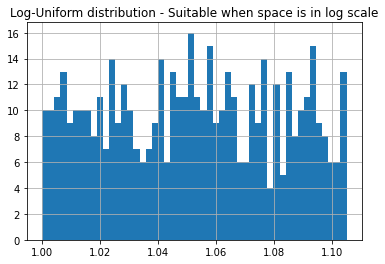

example values:  [1.0860013130234822, 1.0237977217284218, 1.1034506147769807, 1.0596157302050273, 1.0169467119821802]


In [8]:
# Attention, the use of loguniform for floats < 1 is unintuitive
# (at least for me)

space = [{'example' : hp.loguniform('example', 0.000001, 0.1)}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

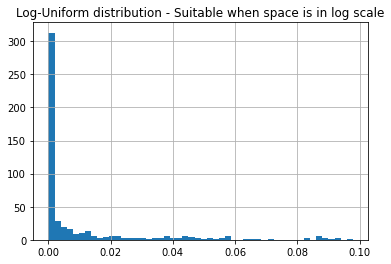

example values:  [0.0007293306199142754, 0.01221547405451933, 0.0004761765470477695, 7.395163938070777e-06, 1.1895135013189773e-06]


In [9]:
# if we want a log distribution over 0.000001, 0.1
# we need to enter it like this:

space = [{'example' : hp.loguniform('example', np.log(0.000001), np.log(0.1))}]

sample_and_plot(space, 'Log-Uniform distribution - Suitable when space is in log scale')

### q log uniform

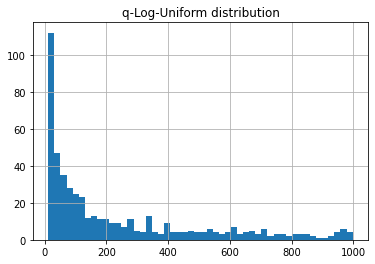

example values:  [70.41641409770662, 207.33721928769174, 140.83282819541324, 868.4691072050484, 348.170047483105]


In [10]:
# qloguniform
# example we want to sample trees between 10 and 1000, in increments of 50
# but we think that better values are closer to smaller number of trees,
# so we want to sample more of those

space = [{'example': hp.qloguniform('example', np.log(10), np.log(1000), np.log(50))}]

sample_and_plot(space, 'q-Log-Uniform distribution')

### normal

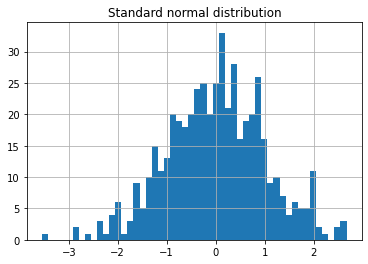

example values:  [-1.9389722000200678, -0.7660768726791747, 1.5739266107444863, 0.5123918767293959, -0.16420274957025494]


In [11]:
# normal

# the standard normal
space = [{'example': hp.normal('example', 0, 1)}]

sample_and_plot(space, 'Standard normal distribution')

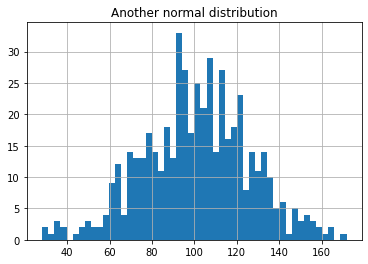

example values:  [120.47481297708227, 86.45846343352156, 139.19860572865812, 62.349233888578595, 73.12788305207368]


In [12]:
# normal

space = [{'example': hp.normal('example', 100, 25)}]

sample_and_plot(space, 'Another normal distribution')

### q normal

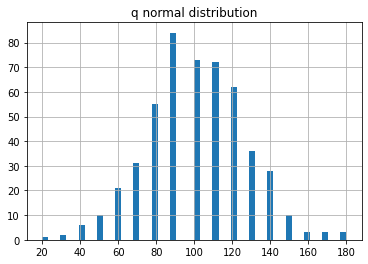

example values:  [130.0, 120.0, 130.0, 120.0, 140.0]


In [13]:
# qnormal
# same as previous but at discrete intervals

space = [{'example': hp.qnormal('example', 100, 25, 10)}]

sample_and_plot(space, 'q normal distribution')

### log normal

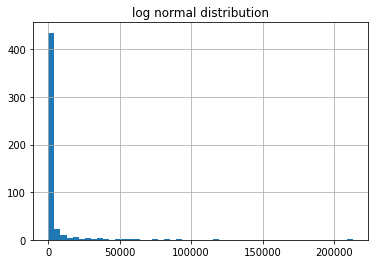

example values:  [253.58762934866508, 12.614791024403088, 474.0193621140791, 31.966815557054918, 114.9872271004771]


In [14]:
# lognormal

space = [{'example': hp.lognormal('example', np.log(100), np.log(25))}]

sample_and_plot(space, 'log normal distribution')

### q log normal

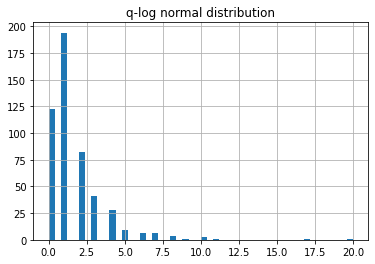

example values:  [5.0, 0.0, 1.0, 1.0, 1.0]


In [15]:
# q-lognormal

space = [{'example': hp.qlognormal('example', 0, 1, 1)}]

sample_and_plot(space, 'q-log normal distribution')

## Categorical hyperparameters

In [16]:
def sample_and_plot(space, title):
    
    vals_ls = []
    
    for i in range(500):
        v = sample(space)
        v = v[0]['example']
        vals_ls.append(v)

    pd.Series(vals_ls).value_counts().plot.bar()
    plt.title(title)
    plt.ylabel('Number of draws')
    plt.show()
    
    print('example values: ', vals_ls[0:5])

### choice

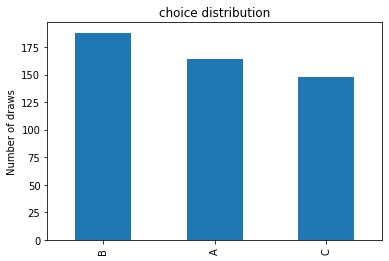

example values:  ['C', 'C', 'B', 'A', 'B']


In [17]:
# choice

space = [{'example': hp.choice('example', ['A', 'B', 'C'])}]

sample_and_plot(space, 'choice distribution')

### pchoice

Draws from a list with a user specified probability.

In [18]:
# pchoice

# example from the Hyperopt article

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.normal('x', 0, 1)}),
    (0.2, {'use_var': 'y', 'y': hp.uniform('y', 1, 3)})])

In [19]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': -0.8152958392414396}
{'use_var': 'y', 'y': 1.5547641504067289}
{'use_var': 'x', 'x': 0.06324752462536772}
{'use_var': 'x', 'x': 1.6427269701257128}
{'use_var': 'x', 'x': 0.12124627014448092}
{'use_var': 'x', 'x': 0.4425572473321835}
{'use_var': 'x', 'x': -0.06826224212892416}
{'use_var': 'x', 'x': -1.2443323813190221}
{'use_var': 'x', 'x': 2.3438909925332205}
{'use_var': 'y', 'y': 1.9826328907743005}
{'use_var': 'x', 'x': -0.23915110558843455}
{'use_var': 'y', 'y': 1.1250707661828727}
{'use_var': 'x', 'x': 2.8658422127221757}
{'use_var': 'y', 'y': 2.6597521708528493}
{'use_var': 'x', 'x': -0.8158767629936838}
{'use_var': 'x', 'x': -0.5298816597042246}
{'use_var': 'x', 'x': -1.8632679316363923}
{'use_var': 'x', 'x': -0.2846391214312358}
{'use_var': 'x', 'x': 2.001045198179582}
{'use_var': 'x', 'x': -0.5474631862860804}


In [20]:
# our own example, realistic, 

# if we want to sample
# a loss function but think that deviance is likely better
# than exponential

space = hp.pchoice('example', [
    (0.8, {'loss': 'deviance'}),
    (0.2, {'loss': 'exponential'})])

# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'exponential'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}
{'loss': 'deviance'}


In [21]:
# our own example, continuing from choice

space = hp.pchoice('example', [
    (0.8, {'use_var': 'x', 'x': hp.choice('a', ['A', 'B'])}),
    (0.2, {'use_var': 'y', 'y': hp.choice('a', ['C', 'D'])})])

In [22]:
# draw samples from space

for i in range(20):
        v = sample(space)
        print(v)

{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'A'}
{'use_var': 'y', 'y': 'D'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}
{'use_var': 'x', 'x': 'B'}


In [23]:
# capture data in a dataframe

vals_ls = []
for i in range(500):
        v = sample(space)
        vals_ls.append(v)
        
v = pd.DataFrame(vals_ls)
v.head()

,use_var,x,y
0,x,B,NaN
1,x,B,NaN
2,x,A,NaN
3,x,B,NaN
4,x,B,NaN


In [24]:
v['use_var'].value_counts(normalize=True)

use_var
x    0.8
y    0.2
Name: proportion, dtype: float64

In [25]:
v['x'].value_counts(normalize=True, dropna=True)

x
A    0.5075
B    0.4925
Name: proportion, dtype: float64

In [26]:
v['x'].value_counts(normalize=True, dropna=False)

x
A      0.406
B      0.394
NaN    0.200
Name: proportion, dtype: float64

In [27]:
v['y'].value_counts(normalize=True)

y
D    0.54
C    0.46
Name: proportion, dtype: float64

In [28]:
v['y'].value_counts(normalize=True, dropna=False)

y
NaN    0.800
D      0.108
C      0.092
Name: proportion, dtype: float64

## Nested spaces

In [29]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

In [30]:
for i in range(20):
        v = sample(space)
        print(v)
        print()

{'type': 'naive_bayes'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 10.0, 'type': 'dtree'}

{'C': 0.7645619567119687, 'kernel': {'ktype': 'linear'}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 8.0, 'type': 'dtree'}

{'C': 2.3722543829250147, 'kernel': {'ktype': 'RBF', 'width': 1.3250105283216356}, 'type': 'svm'}

{'C': 0.25385697251249767, 'kernel': {'ktype': 'RBF', 'width': 4.690464881638489}, 'type': 'svm'}

{'criterion': 'entropy', 'max_depth': 53.0, 'min_samples_split': 37.0, 'type': 'dtree'}

{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 2.0, 'type': 'dtree'}

{'C': 0.378187449917547, 'kernel': {'ktype': 'RBF', 'width': 0.6679000748987673}, 'type': 'svm'}

{'type': 'naive_bayes'}

{'C': 1.2576502204313313, 'kernel': {'ktype': 'RBF', 'width': 0.6729564107091213}, 'type': 'svm'}

{'criterion': 'gini', 'max_depth': 9.0, 'min_samples_split': 7.0, 'type': 'dtree'}

{'C': 0.5974557419977169, 'kernel': {'ktype'